# W10 - Class Assignment

Evelin Alim Natadjaja / 0706022310021

## Import Libraries


In [83]:
!pip install kneed

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
import seaborn as sns

## A. Data Preparation

### Data Understanding

In [85]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


In [87]:
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


In [88]:
# Check for missing values
df.isna().sum()

,0
Income,0
Age,0
Education,0
Credit_Score,0
Years_with_Bank,0
Transaction_Count,0
Balance,0
Loan_Approval_Amount,0
Credit_Card_Limit,0
Purchase_Frequency,0


### Encoding

In [89]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [90]:
# Ensure all features used for clustering are numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    int64  
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(6)
memory usage: 47.0 KB


## B. Exploratory Data Analysis

### Scatterplot Income vs Credit Score

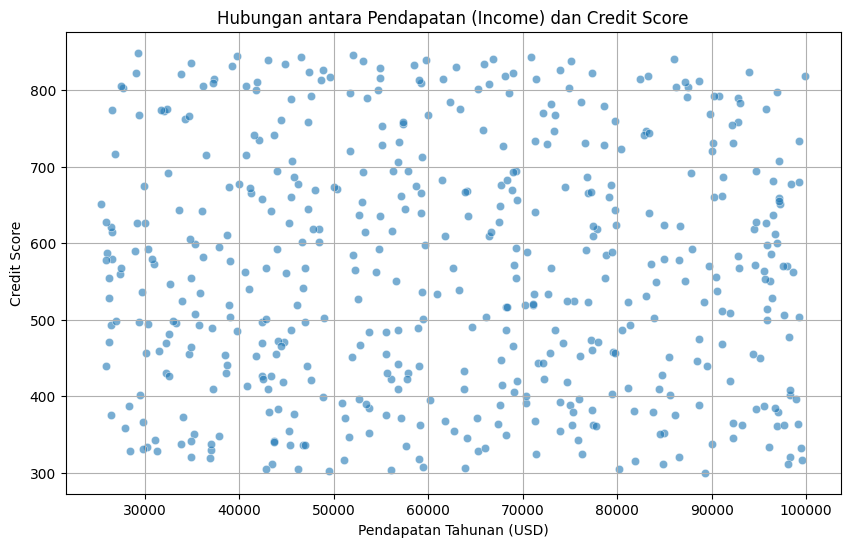

In [91]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='Credit_Score', alpha=0.6)
plt.title('Hubungan antara Pendapatan (Income) dan Credit Score')
plt.xlabel('Pendapatan Tahunan (USD)')
plt.ylabel('Credit Score')
plt.grid(True)
plt.show()

Analisis scatterplot yang membandingkan pendapatan (Income) dan credit score menunjukkan tidak adanya korelasi linear yang jelas di antara kedua variabel tersebut. Poin data tersebar secara acak, mengindikasikan bahwa pendapatan tinggi tidak secara otomatis menjamin credit score yang tinggi, dan sebaliknya, pendapatan rendah tidak selalu berarti credit score yang buruk. Wawasan ini sangat krusial bagi bank, karena membuktikan bahwa pendapatan saja bukanlah prediktor yang andal untuk kelayakan kredit. Oleh karena itu, diperlukan analisis yang lebih mendalam, seperti clustering, untuk memahami profil risiko pelanggan secara lebih holistik dengan mempertimbangkan faktor-faktor lain.

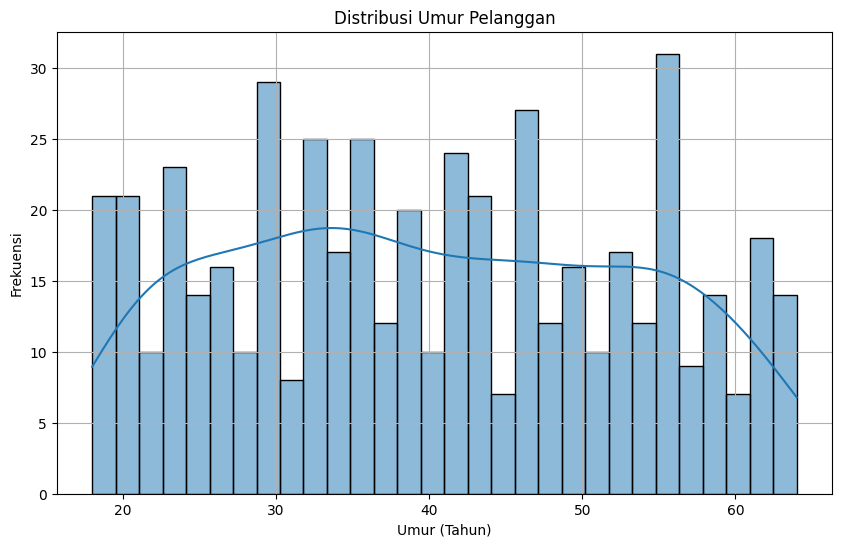

In [92]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribusi Umur Pelanggan')
plt.xlabel('Umur (Tahun)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

Histogram distribusi umur pelanggan menunjukkan basis pelanggan yang beragam dan tersebar luas, bukan terpusat pada satu kelompok usia saja. Grafik ini memiliki beberapa puncak (multimodal), dengan konsentrasi pelanggan yang terlihat jelas di sekitar usia 30-an dan usia 55-an. Ini menyiratkan bahwa bank melayani pelanggan dari berbagai tahapan kehidupan—mulai dari profesional muda yang mungkin membutuhkan KPR, hingga pelanggan yang lebih mapan yang mendekati usia pensiun dan mungkin lebih tertarik pada produk investasi. Keragaman demografis ini menegaskan bahwa strategi pemasaran "satu untuk semua" tidak akan efektif, sehingga segmentasi pelanggan menjadi langkah penting untuk merancang penawaran produk yang relevan dan personal.

## C. Clustering Modeling

### Create Scaled and Non-scaled Dataset

In [93]:
df_scaled = df.copy()
df_non_scaled = df.copy()

### Model for scaled dataset

In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled))
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.547319,0.847826,0.000000,0.369763,0.000000,0.408163,0.193572,0.029249,0.253071,0.981339,0.000000,0.201660
1,0.714674,0.913043,0.333333,0.872495,0.055556,0.265306,0.981148,0.622168,0.156912,0.951646,0.333333,0.548819
2,0.601586,0.608696,0.333333,0.398907,0.722222,0.959184,0.702173,0.314149,0.264828,0.273732,0.666667,0.842872
3,0.543366,0.521739,0.333333,0.972678,0.888889,0.775510,0.799580,0.903072,0.088324,0.819201,1.000000,0.118321
4,0.421424,0.391304,0.000000,0.200364,0.611111,0.581633,0.049679,0.971662,0.481592,0.348102,1.000000,0.990257


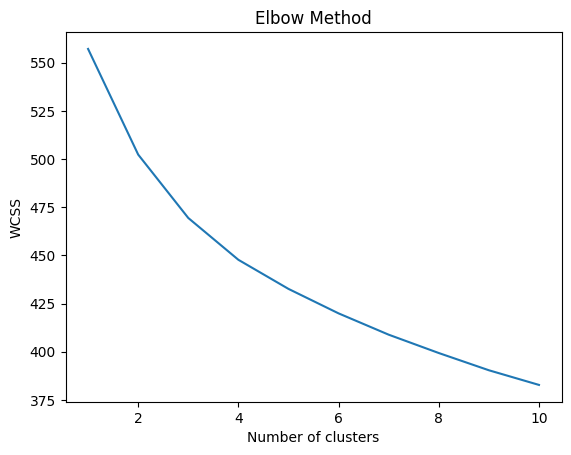

In [95]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [96]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters        WCSS
0                   1  557.141093
1                   2  502.318359
2                   3  469.421175
3                   4  447.720119
4                   5  432.616866
5                   6  419.912922
6                   7  408.859124
7                   8  399.339049
8                   9  390.393978
9                  10  382.787565


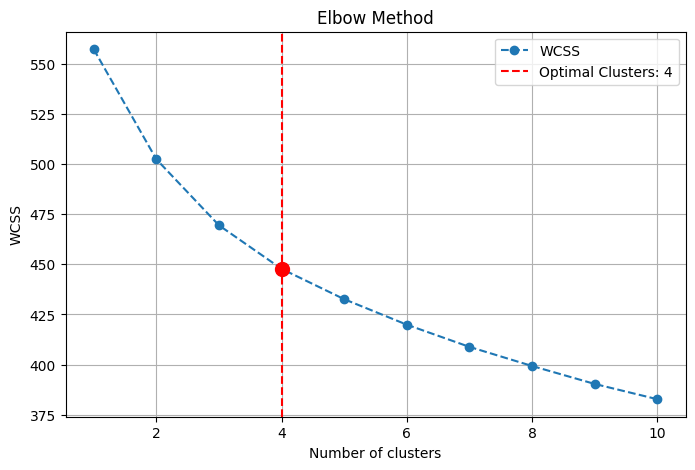

The optimal number of clusters is: 4


In [97]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [98]:
# Fit K-Means to the data with the optimal number of K cluster = 2
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the DataFrame
df_scaled['KMeans_Cluster'] = clusters

# Show the df
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,KMeans_Cluster
0,0.547319,0.847826,0.000000,0.369763,0.000000,0.408163,0.193572,0.029249,0.253071,0.981339,0.000000,0.201660,3
1,0.714674,0.913043,0.333333,0.872495,0.055556,0.265306,0.981148,0.622168,0.156912,0.951646,0.333333,0.548819,3
2,0.601586,0.608696,0.333333,0.398907,0.722222,0.959184,0.702173,0.314149,0.264828,0.273732,0.666667,0.842872,1
3,0.543366,0.521739,0.333333,0.972678,0.888889,0.775510,0.799580,0.903072,0.088324,0.819201,1.000000,0.118321,1
4,0.421424,0.391304,0.000000,0.200364,0.611111,0.581633,0.049679,0.971662,0.481592,0.348102,1.000000,0.990257,1


### Model for non-scaled dataset

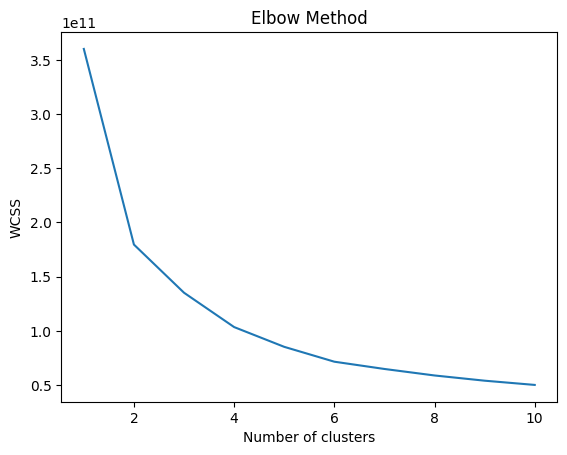

In [99]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_non_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [100]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters          WCSS
0                   1  3.601357e+11
1                   2  1.796223e+11
2                   3  1.351798e+11
3                   4  1.034966e+11
4                   5  8.526114e+10
5                   6  7.154790e+10
6                   7  6.483984e+10
7                   8  5.884440e+10
8                   9  5.402805e+10
9                  10  5.012191e+10


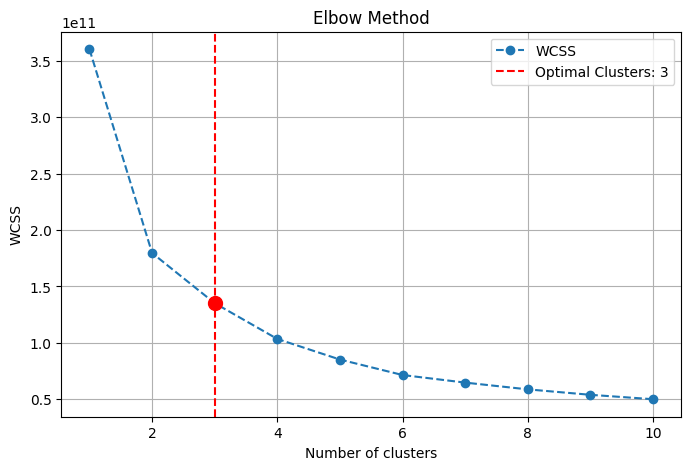

The optimal number of clusters is: 3


In [101]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [102]:
# Fit K-Means to the data with the optimal number of K cluster = 2
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_non_scaled)

# Add the cluster labels to the DataFrame
df_non_scaled['KMeans_Cluster'] = clusters

# Show the df
df_non_scaled.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,KMeans_Cluster
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,2
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,1
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,2
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,1
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,1


### Merging cluster labels

In [103]:
df['KMeans_Scaled'] = df_scaled['KMeans_Cluster']
df['KMeans_Non_Scaled'] = df_non_scaled['KMeans_Cluster']
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,KMeans_Scaled,KMeans_Non_Scaled
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,3,2
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,3,1
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,1,2
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,1,1
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,1,1


### Comparing cluster quality and interpretability

In [104]:
from sklearn.metrics import silhouette_score

silhouette_unscaled = silhouette_score(df_non_scaled, df['KMeans_Non_Scaled'])
silhouette_scaled = silhouette_score(df_scaled, df['KMeans_Scaled'])

print("--- Perbandingan Kualitas Cluster ---")
print(f"Silhouette Score (Non-scaled Data): {silhouette_unscaled:.4f}")
print(f"Silhouette Score (Scaled Data):   {silhouette_scaled:.4f}")

print("\n--- Kesimpulan Awal ---")
if silhouette_scaled > silhouette_unscaled:
    print("Model SCALED menghasilkan cluster yang lebih baik (skor lebih tinggi).")
else:
    print("Model NON-SCALED menghasilkan cluster yang lebih baik (skor lebih tinggi).")

--- Perbandingan Kualitas Cluster ---
Silhouette Score (Non-scaled Data): 0.3475
Silhouette Score (Scaled Data):   0.2615

--- Kesimpulan Awal ---
Model NON-SCALED menghasilkan cluster yang lebih baik (skor lebih tinggi).


### 2D PLOT

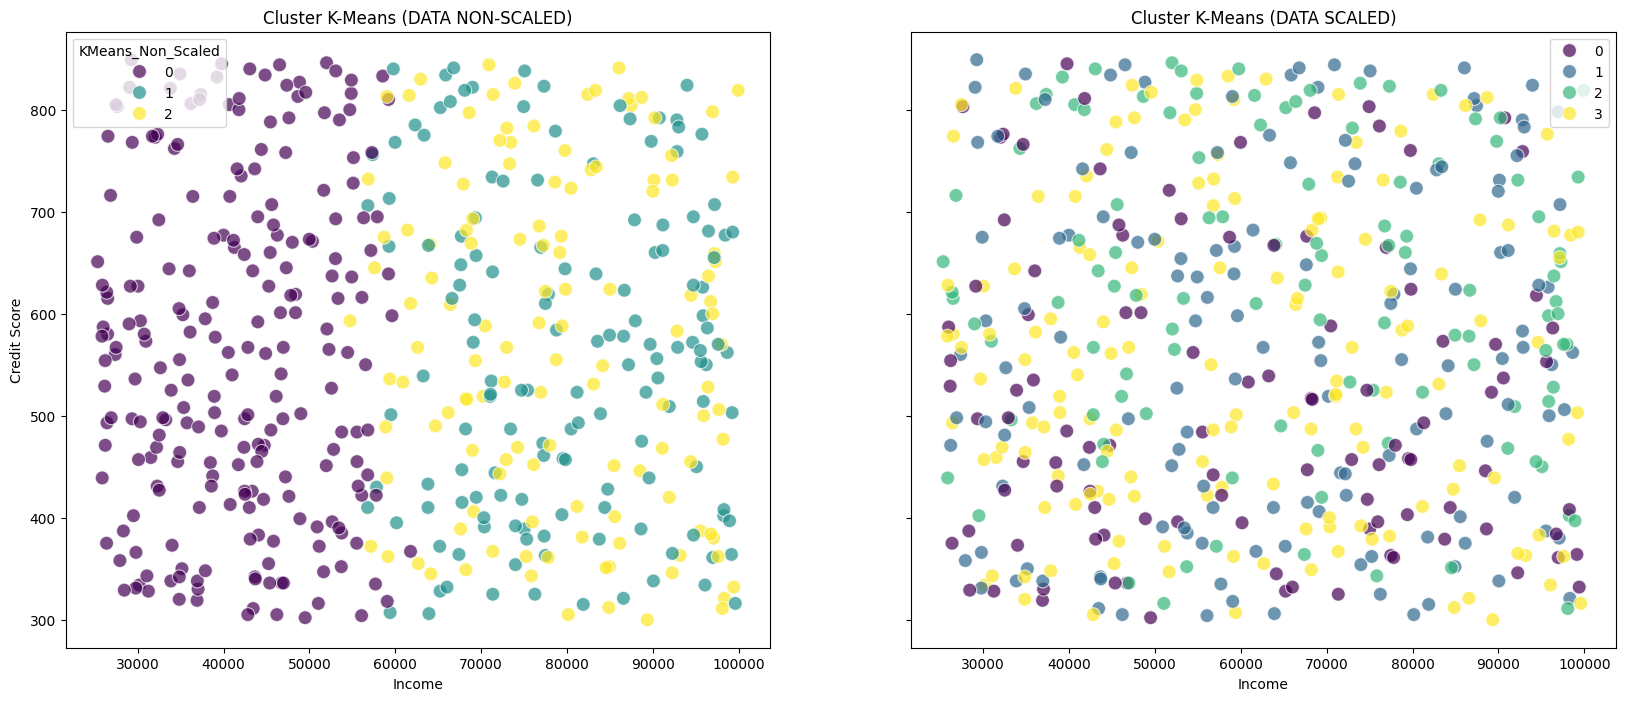

In [105]:
# Membuat 2 plot (1 baris, 2 kolom) untuk perbandingan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

sns.scatterplot(data=df,
                x='Income',
                y='Credit_Score',
                hue='KMeans_Non_Scaled',
                palette='viridis',
                alpha=0.7,
                s=100,
                ax=ax1)
ax1.set_title('Cluster K-Means (DATA NON-SCALED)')
ax1.set_xlabel('Income')
ax1.set_ylabel('Credit Score')

# Plot 2: Hasil Clustering pada Data SCALED
sns.scatterplot(data=df,
                x='Income',
                y='Credit_Score',
                hue='KMeans_Scaled',
                palette='viridis',
                alpha=0.7,
                s=100,
                ax=ax2)
ax2.set_title('Cluster K-Means (DATA SCALED)')
ax2.set_xlabel('Income')
ax2.set_ylabel('Credit Score')

plt.legend()
plt.show()

### 3D PLOT

Scaled

In [106]:
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Age'
y_col = 'Income'
z_col = 'Credit_Score'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df['KMeans_Scaled'].astype(str),
                    title='Interactive 3D Scatter Plot of Customers by Agglo Clusters')

fig.show()

Non-Scaled

In [107]:
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Age'
y_col = 'Income'
z_col = 'Credit_Score'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df['KMeans_Non_Scaled'].astype(str),
                    title='Interactive 3D Scatter Plot of Customers by Agglo Clusters')

fig.show()

### Cluster profile and summary

Scaled

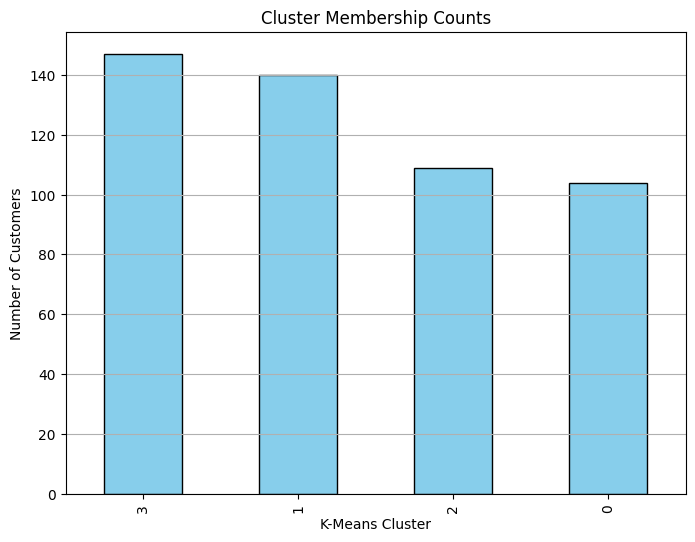

In [108]:
cluster_counts = df['KMeans_Scaled'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

In [112]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_profile_scaled = df.groupby('KMeans_Scaled').mean(numeric_only=True).round(2)
print(cluster_profile_scaled)

                 Income    Age  Education  Credit_Score  Years_with_Bank  \
KMeans_Scaled                                                              
0              59678.80  44.92       2.51        516.81            12.07   
1              64044.74  40.05       0.52        567.12            11.26   
2              65893.18  36.21       2.59        621.65             9.07   
3              59640.79  39.31       0.68        555.04            10.76   

               Transaction_Count  Balance  Loan_Approval_Amount  \
KMeans_Scaled                                                     
0                          50.02  4319.90              27861.38   
1                          46.69  5250.85              23971.01   
2                          50.38  5736.91              24117.76   
3                          47.71  4909.54              25955.08   

               Credit_Card_Limit  Purchase_Frequency  Customer_Satisfaction  \
KMeans_Scaled                                                

Non-Scaled

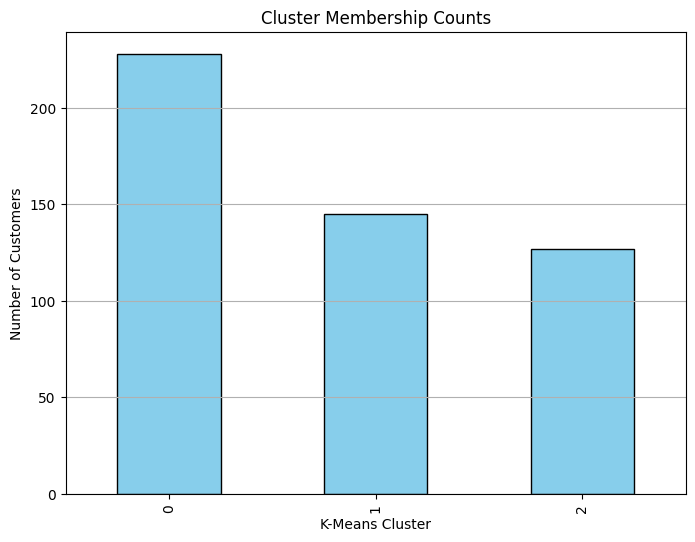

In [116]:
cluster_counts = df['KMeans_Non_Scaled'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

In [117]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_profile_nonscaled = df.groupby('KMeans_Non_Scaled').mean(numeric_only=True).round(2)
print(cluster_profile_nonscaled)

                     Income    Age  Education  Credit_Score  Years_with_Bank  \
KMeans_Non_Scaled                                                              
0                  41785.92  39.97       1.41        563.36            11.02   
1                  79841.47  41.19       1.51        560.43            10.94   
2                  78883.54  38.72       1.39        573.13            10.26   

                   Transaction_Count  Balance  Loan_Approval_Amount  \
KMeans_Non_Scaled                                                     
0                              50.73  4774.29              25645.04   
1                              50.90  5191.99              36968.70   
2                              41.70  5433.35              11734.08   

                   Credit_Card_Limit  Purchase_Frequency  \
KMeans_Non_Scaled                                          
0                           10808.30                0.51   
1                           10476.59                0.52   
2  

## D. Segmentation & Managerial Implication

### 1. Model yang lebih baik: Scaled

**Model yang lebih baik adalah model yang menggunakan data yang diskalakan (`KMeans_Scaled`).**

Berdasarkan tabel ringkasan, model `KMeans_Unscaled` hanya menghasilkan 3 *cluster* yang pemisahannya tampak sangat dipengaruhi oleh satu atau two fitur dengan nilai besar (kemungkinan besar `Income` dan `Loan_Approval_Amount`). Perhatikan bahwa fitur-fitur lain seperti `Age`, `Credit_Score`, dan `Customer_Satisfaction` memiliki nilai rata-rata yang hampir serupa di ketiga *cluster* tersebut.

Sebaliknya, model `KMeans_Scaled` (dengan K=4) menunjukkan pemisahan *cluster* yang jauh lebih jelas dan bermakna. Kita dapat melihat perbedaan signifikan di *semua* fitur, termasuk `Age`, `Education`, `Credit_Score`, dan yang paling penting, `Customer_Satisfaction`.

**Scaling sangat memengaruhi hasil karena : **

* K-Means mengelompokkan data berdasarkan jarak Euclidean.
* Tanpa *scaling*, fitur dengan rentang nilai besar (misalnya `Income` [60.000] atau `Balance` [5.000]) akan secara matematis "mendominasi" perhitungan jarak dibandingkan fitur dengan rentang nilai kecil (misalnya `Customer_Satisfaction` [1-10] atau `Education` [0-3]).
* Akibatnya, model *unscaled* pada dasarnya hanya mengelompokkan pelanggan berdasarkan pendapatan mereka dan mengabaikan metrik penting lainnya seperti kepuasan atau perilaku digital.
* Scaling memaksa K-Means untuk memberi "bobot" yang sama pada setiap fitur, sehingga cluster yang dihasilkan mencerminkan pola yang lebih holistik dan akurat di seluruh profil pelanggan.

### 2. Analisis dan Interpretasi Karakteristik Cluster (Model Scaled)
Berdasarkan tabel `KMeans_Scaled`, berikut adalah interpretasi dan persona untuk setiap *cluster*:

* **Cluster 0: "Senior Loyal, Teredukasi, & Berisiko Tinggi"**

* **Cluster 1: "Pelanggan Stabil, Puas, & Tradisional"**

* **Cluster 2: "Profesional Muda, Kaya, & Sangat Tidak Puas"**

* **Cluster 3: "Pengguna Digital Aktif & Paling Frustrasi"**

### 3. Rekomendasi Manajerial
Berdasarkan persona di atas, berikut adalah rekomendasi strategi untuk setiap segmen:

* **Untuk Cluster 0 (Senior Berisiko):**
    * **Prioritas:** Mitigasi Risiko.
    * **Rekomendasi:** Segera tinjau portofolio pinjaman segmen ini. Tawarkan produk konsultasi manajemen utang atau restrukturisasi, bukan pinjaman baru. Karena mereka teredukasi, materi edukasi keuangan tingkat lanjut mungkin efektif.

* **Untuk Cluster 1 (Stabil & Puas):**
    * **Prioritas:** Retensi & *Cross-selling*.
    * **Rekomendasi:** Hargai kesetiaan mereka. Jangan "goyang perahu" dengan perubahan drastis. Tawarkan produk tambahan yang sederhana dan bernilai (misalnya, program loyalitas, rekening tabungan dengan bunga sedikit lebih tinggi). Mereka adalah fondasi yang stabil.

* **Untuk Cluster 2 (Muda, Kaya, & Tidak Puas):**
    * **Prioritas:** Retensi prioritas tertinggi.
    * **Rekomendasi:** Ini adalah segmen paling berharga dan paling berisiko *churn*. Lakukan intervensi segera. Hubungi mereka secara proaktif (misalnya, melalui survei mendalam atau *personal banker*) untuk mengidentifikasi "pain points" mereka. Tawarkan layanan *premium* atau *concierge* untuk menyelesaikan masalah mereka dan membuat mereka merasa dihargai.

* **Untuk Cluster 3 (Digital Aktif & Frustrasi):**
    * **Prioritas:** Perbaikan Pengalaman Digital (UX/UI).
    * **Rekomendasi:** Kepuasan terendah dan aktivitas *online* tertinggi adalah sinyal jelas: aplikasi atau website bank memiliki masalah. Prioritaskan perbaikan bug, penyederhanaan alur kerja, dan peningkatan fitur pada platform digital Anda. Gunakan segmen ini sebagai beta tester untuk fitur baru.